# Pendeteksi Berita Palsu Menggunakan Model Artificial Neural Network dengan Pytorch

## Persiapan

### Import Library yang Digunakan
Pada proses ini dilakukan import library yang akan digunakan

In [1]:
#Data Manupulasi
import numpy as np
import pandas as pd

#Natural Language Processing
import re 
import nltk 
from sklearn.feature_extraction.text import CountVectorizer

#Pytorch
import torch
import torch.nn as nn

#Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#Training, Testing
from sklearn.model_selection import train_test_split

### Import Dataset yang Digunakan
Selanjutnya import dataset yang disediakan. Pada tahap ini menggunakan dua dataset yang berisikan contoh berita asli dan palsu. Setelah diimport, lihat informasi tentang struktur dan tipe data dalam dataset.

In [2]:
#Membaca Dataset

asli = pd.read_csv("True.csv")
palsu = pd.read_csv("Fake.csv")

In [3]:
#Mendapatkan informasi tentang struktur dan tipe data dalam Dataset 'asli'

asli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [4]:
##Mendapatkan informasi tentang struktur dan tipe data dalam Dataset 'palsu'

palsu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


### Penambahan Label Untuk Masing-Masing Dataset
Jika sudah berhasil diimport, langkah selanjutnya adalah memberikan label pada setiap dataset. Label digunakan untuk membedakan dan memberi nilai antara berita palsu dengan berita asli. Berita palsu diberi nilai 0 dan berita asli diberi nilai 1. Nilai pada label menggunakan type integer.

In [5]:
#menambahkan kolom "label" pada Data asli dan palsi dengan nilai yang menandakan apakah berita tersebut dikategorikan sebagai benar atau palsu.

asli["label"] = np.ones(len(asli),dtype=int)
palsu["label"] = np.zeros(len(palsu),dtype=int)

In [6]:
#menampilkan beberapa baris pertama dari Data 'asli'

asli.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
#menampilkan beberapa baris pertama dari Data 'fake'

palsu.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


### Penggabungan Dataset
Setelah diberi label, kedua dataset tersebut digabungkan menjadi satu dataset degan menggunakan fungsi pd.concat() dan hasilnya disimpan dalam variabel data.

In [8]:
#menggabungkan dua Dataset, 'asli' dan 'palsu', menjadi satu Data tunggal dengan menggunakan fungsi pd.concat().
#hasil penggabungan disimpan dalam variabel data.
#data.info() untuk mencetak informasi tentang struktur dan tipe data dalam DataFrame 'data'.

data = pd.concat((asli,palsu),axis=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int32 
dtypes: int32(1), object(4)
memory usage: 1.9+ MB
None


### Pengacakan Dataset
Setelah dataset digabungkan, dilakukan pengacakan baris dalam dataset agar tidak terjadi bias saat melakukan training.

In [9]:
#data = data.sample(frac=1): Baris ini digunakan untuk mengacak baris-baris dalam DataFrame data.
#fungsi sample() digunakan untuk mengambil sampel acak dari DataFrame. 
#frac=1 mengambil seluruh DataFrame dengan urutan acak (frac=1 berarti mengambil 100% dari data). Dengan mengacak baris-baris dan mengubah urutan data dalam DataFrame secara acak.

data = data.sample(frac=1)
data.head(10)

,title,text,subject,date,label
3096,Trump Just Got RAZED After His Painfully Stup...,Here s a news flash for Donald Trump: Mexico w...,News,"January 9, 2017",0
5195,"Pompe drug lauded by Trump costs $300,000 a year",(Reuters) - President Donald Trump told Congre...,politicsNews,"March 1, 2017",1
8044,"Trump Supporters Attack Latina Protester, Get...",Another person was attacked at a Trump rally i...,News,"February 17, 2016",0
651,House speaker: May need a temporary bill to fu...,WASHINGTON (Reuters) - U.S. lawmakers may have...,politicsNews,"November 14, 2017",1
6167,Gohmert: Homosexuality Is ‘Perverse’ Because ...,Rep. Louie Gohmert is perhaps America s most t...,News,"May 26, 2016",0
23367,BOILER ROOM – EP #54 – America… The End is Nigh,Tune in to the Alternate Current Radio Network...,Middle-east,"April 28, 2016",0
1129,"Bush takes veiled swipe at Trump, defends immi...",(Reuters) - Former President George W. Bush de...,politicsNews,"October 19, 2017",1
111,GOP Senate Candidate Turns Out To Be A Disgus...,The Republican favorite in Alabama s Senate ra...,News,"November 9, 2017",0
10616,"Republicans Rubio, Cruz release taxes, piling ...",WASHINGTON (Reuters) - Republican presidential...,politicsNews,"February 27, 2016",1
12970,Kazakh leader tells cabinet: Make state firms ...,ASTANA (Reuters) - Kazakh President Nursultan ...,worldnews,"December 6, 2017",1


## Data Overview

### Keseimbangan Data
Pada bagian ini data diperiksa apakah jumlah data asli dan palsu seimbang.

label
0    23481
1    21417
Name: label, dtype: int64


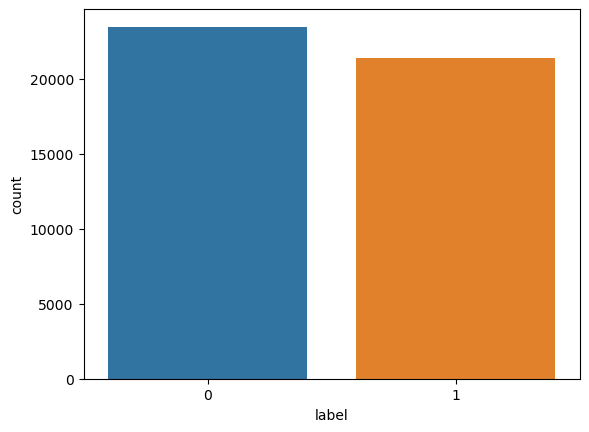

In [10]:
#pada bgaian ini melihat apakah data seimbang

print(data.groupby(['label'])['label'].count())
sns.countplot(x="label", data=data)
plt.show()

Dari hasil di atas terlihat bahwa data berita palsu sedikit lebih banyak dibanding dengan data berita asli, tetapi tidak menjadi masalah. Sehingga bisa dikatakan bahwa jumlah data seimbang

### Melihat Berapa Banyak Kelas Subject
Selanjutnya, memeriksa berapa banyak kelas subject yang ada pada data dan menampilkannya dalam bentuk bar.

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


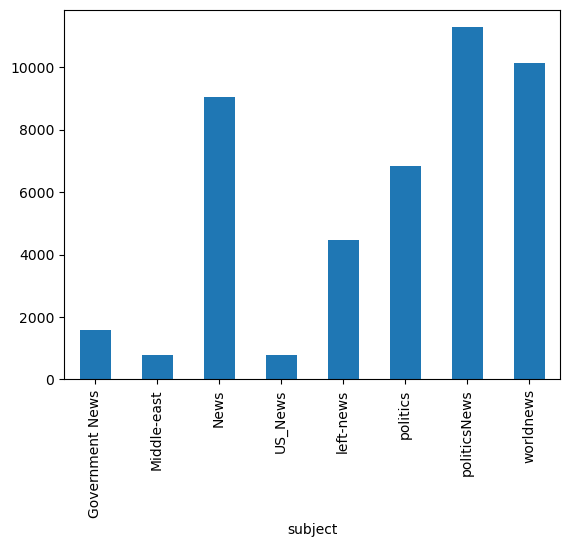

In [11]:
#melihat berapa banyak kelas yang terdapat dalam data

print(data["subject"].value_counts())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

Berdasarkan hasil di atas, dapat dilihat bahwa pada data terdapat 8 jenis subject, di mana subject terbanyak pada data adalah politicsNews

## Data Preprocessing

### Ubah Subject Menjadi Variabel Dummy
Ubah kolom subject menjadi variabel dummy agar dapat digunakan dalam pemodelan atau analisis lebih lanjut.

In [12]:
#data = pd.get_dummies(data, columns=["subject"]): Baris ini digunakan untuk mengubah fitur "subject" dalam DataFrame data menjadi variabel dummy
#get_dummies() digunakan untuk menghasilkan setiap nilai dalam fitur "subject" akan diubah menjadi kolom terpisah dalam DataFrame, dengan nilai biner (0 atau 1) yang menunjukkan apakah nilai tersebut ada dalam baris data tertentu atau tidak.

data = pd.get_dummies(data, columns=["subject"])
data.head()

,title,text,date,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
3096,Trump Just Got RAZED After His Painfully Stup...,Here s a news flash for Donald Trump: Mexico w...,"January 9, 2017",0,0,0,1,0,0,0,0,0
5195,"Pompe drug lauded by Trump costs $300,000 a year",(Reuters) - President Donald Trump told Congre...,"March 1, 2017",1,0,0,0,0,0,0,1,0
8044,"Trump Supporters Attack Latina Protester, Get...",Another person was attacked at a Trump rally i...,"February 17, 2016",0,0,0,1,0,0,0,0,0
651,House speaker: May need a temporary bill to fu...,WASHINGTON (Reuters) - U.S. lawmakers may have...,"November 14, 2017",1,0,0,0,0,0,0,1,0
6167,Gohmert: Homosexuality Is ‘Perverse’ Because ...,Rep. Louie Gohmert is perhaps America s most t...,"May 26, 2016",0,0,0,1,0,0,0,0,0


### Hapus Kolom Date
Selanjutnya hapus kolom date karena kolom tersebut tidak diperlukan dalam pemrosesan selanjutnya dan tidak memberikan informasi yang relevan.

In [13]:
#data = data.drop("date", axis=1): Baris ini digunakan untuk menghapus kolom "date" dari DataFrame 'data' dengan menggunakan fungsi drop()
#axis=1 menunjukkan menghapus kolom (axis 1) bukan baris
#data = data.drop("date", axis=1) adalah untuk menghapus kolom "date" dari DataFrame 'data', karena kolom tersebut tidak diperlukan dalam analisis atau pemrosesan selanjutnya.

data = data.drop("date",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 3096 to 1592
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   label                    44898 non-null  int32 
 3   subject_Government News  44898 non-null  uint8 
 4   subject_Middle-east      44898 non-null  uint8 
 5   subject_News             44898 non-null  uint8 
 6   subject_US_News          44898 non-null  uint8 
 7   subject_left-news        44898 non-null  uint8 
 8   subject_politics         44898 non-null  uint8 
 9   subject_politicsNews     44898 non-null  uint8 
 10  subject_worldnews        44898 non-null  uint8 
dtypes: int32(1), object(2), uint8(8)
memory usage: 1.5+ MB


### Natural Language Processing
Pemrosesan bahasa alami. Pada langkah ini akan memproses fitur teks dan label.

Import nltk dan download modul punkt yang berguna untuk tokenisasi data.

In [14]:
#import nltk digunakan untuk mengimpor pustaka Natural Language Toolkit (NLTK) ke dalam Python
#nltk.download('punkt') digunakan untuk mengunduh data yang diperlukan oleh NLTK untuk tokenisasi kata. Tokenisasi kata adalah proses memecah teks menjadi unit-unit kata yang lebih kecil atau token.
import nltk
nltk.download('punkt')
print("Unduhan Selesai")

Unduhan Selesai


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Import nltk dan download modul wordnet yang berguna untuk melakukan lemmatisasi kata serta mencari sinonim dan antonim.

In [15]:
#nltk.download('wordnet') digunakan untuk mengunduh data yang diperlukan oleh NLTK untuk akses ke WordNet. WordNet adalah kamus leksikal bahasa Inggris yang berisi informasi tentang kata-kata, termasuk definisi, sinonim, antonim, dll.
import nltk
nltk.download('wordnet')
print("Unduhan Selesai")

Unduhan Selesai


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Selanjutnya dilakukan pemrosesan teks dalam kolom text dari data mulai dari pembersihan (cleaning), konversi ke huruf kecil (lowercasing), tokenisasi kata (word tokenization), lemmatisasi, dan penggabungan kembali teks yang telah diproses. Kemudian hasilnya disimpan dalam list new_text.

In [16]:
#kode ini adalah untuk memproses teks dalam kolom "text" dari DataFrame data dengan langkah-langkah pembersihan (cleaning), konversi ke huruf kecil (lowercasing), tokenisasi kata (word tokenization), lemmatisasi, dan penggabungan kembali teks yang telah diproses. Hasilnya disimpan dalam list new_text, dan new_text[0] mencetak teks yang telah diproses pertama dari list tersebut.
new_text = []
pattern = "[^a-zA-Z]"
lemma = nltk.WordNetLemmatizer()

for txt in data.text:
    
    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = " ".join(txt)
    new_text.append(txt)
    
    
new_text[0]

'here s a news flash for donald trump mexico won t be paying for his racist little wall not now not tomorrow not six month from now not ever on friday trump made himself the subject of mockery after inexplicably claiming that mexico will pay for the wall later if american taxpayer foot the bill first and that he would seek repayment through a negotiation of nafta in other word you re paying for the wall and mexico will still not be paying for it later but at least trump can get it built trump s team ha made a number of wacky proposal related to paying for the wall including amending the patriot act to include wire transfer a account that could be frozen and otherwise punishing mexico for their refusal to fund what could possibly be the most fiscally irresponsible undertaking since well any of the bazillion business trump ha bankrupted they have even discussed tying it to the appropriation process which could force democrat to agree to funding to keep the government from shutting down b

Selanjutnya dilakukan pemrosesan teks dalam kolom title dari data mulai dari pembersihan (cleaning), konversi ke huruf kecil (lowercasing), tokenisasi kata (word tokenization), lemmatisasi, dan penggabungan kembali teks yang telah diproses. Kemudian hasilnya disimpan dalam list new_title.

In [17]:
# kode ini adalah untuk memproses judul (title) dalam kolom "title" dari DataFrame data dengan langkah-langkah pembersihan (cleaning), konversi ke huruf kecil (lowercasing), tokenisasi kata (word tokenization), lemmatisasi, dan penggabungan kembali judul yang telah diproses. Hasilnya disimpan dalam list new_title, dan new_title[0] mencetak judul yang telah diproses pertama dari list tersebut.
new_title = []
for txt in data.title:
    
    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = " ".join(txt)
    new_title.append(txt)
new_title[0]

'trump just got razed after his painfully stupid attack on the fake medium tweet'

Kode ini digunakan untuk menghasilkan matriks representasi vektor untuk teks judul (title) dan teks utama (text) berdasarkan frekuensi kemunculan kata-kata yang telah diproses sebelumnya menggunakan CountVectorizer.

In [18]:
#countVectorizer untuk mengubah teks judul (title) dan teks utama (text) menjadi representasi vektor berdasarkan frekuensi kemunculan kata-kata.
#kode ini adalah untuk menghasilkan matriks representasi vektor untuk teks judul (title_matrix) dan teks utama (text_matrix) berdasarkan frekuensi kemunculan kata-kata yang telah diproses sebelumnya menggunakan CountVectorizer.
vectorizer_title = CountVectorizer(stop_words="english",max_features=1000)
vectorizer_text = CountVectorizer(stop_words="english",max_features=4000)

title_matrix = vectorizer_title.fit_transform(new_title).toarray() 
text_matrix = vectorizer_text.fit_transform(new_text).toarray()

print("Selesai")

Selesai


Hapus kolom "title" dan "text" dari DataFrame data serta mencetak informasi ringkas tentang DataFrame data setelah penghapusan.

In [20]:
#menghapus kolom "title" dan "text" dari DataFrame data dan mencetak informasi ringkas tentang DataFrame data setelah penghapusan.
data.drop(["title","text"],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 3096 to 1592
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   label                    44898 non-null  int32
 1   subject_Government News  44898 non-null  uint8
 2   subject_Middle-east      44898 non-null  uint8
 3   subject_News             44898 non-null  uint8
 4   subject_US_News          44898 non-null  uint8
 5   subject_left-news        44898 non-null  uint8
 6   subject_politics         44898 non-null  uint8
 7   subject_politicsNews     44898 non-null  uint8
 8   subject_worldnews        44898 non-null  uint8
dtypes: int32(1), uint8(8)
memory usage: 876.9 KB


Pastikan bahwa pemrosesan dan transformasi teks telah dilakukan dengan benar, serta untuk memahami ukuran data yang akan digunakan dalam analisis atau pemodelan selanjutnya dengan cara melihat dimensi dari DataFrame data, title_matrix, dan text_matrix setelah dilakukan pemrosesan dan transformasi teks menggunakan CountVectorizer.

In [21]:
#melihat dimensi dari DataFrame 'data', title_matrix, dan text_matrix setelah dilakukan pemrosesan dan transformasi teks menggunakan CountVectorizer. Ini memberikan informasi tentang jumlah baris dan kolom dalam DataFrame 
print(data.shape)
print(title_matrix.shape)
print(text_matrix.shape)

(44898, 9)
(44898, 1000)
(44898, 4000)


Langkah selanjutnya adalah membuat target variabel y berdasarkan kolom "label" dalam DataFrame data, dan membuat matriks fitur x dengan menggabungkan beberapa komponen seperti kolom-kolom lain dari DataFrame data, title_matrix, dan text_matrix.

In [22]:
#membuat target variabel y berdasarkan kolom "label" dalam DataFrame 'data', dan membuat matriks fitur x dengan menggabungkan beberapa komponen seperti kolom-kolom lain dari DataFrame 'data',
# Creating Y
y = data.label
# Creating X
x = np.concatenate((np.array(data.drop("label",axis=1)),title_matrix,text_matrix),axis=1)

Setelah itu pastikan data telah disiapkan dengan benar dengan cara melihat dimensi dari matriks fitur dan target variabel.

In [23]:
#untuk melihat dimensi dari matriks fitur x dan target variabel y
print(x.shape)
print(y.shape)

(44898, 5008)
(44898,)


### Pembagian Data
Jika data sudah diolah, langkah selanjutnya dilakukan pembagian dataset menjadi subset training dan testing, di mana subset testing sebesar 25% dari jumlah keseluruhan dataset.

In [24]:
#membagi dataset menjadi subset pelatihan dan pengujian menggunakan fungsi train_test_split, dan kemudian mencetak dimensi dari subset pelatihan dan pengujian matriks fitur serta target variabel
from sklearn.model_selection import train_test_split

# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(x,np.array(y),test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(33673, 5008)
(11225, 5008)
(33673,)
(11225,)
